<a href="https://colab.research.google.com/github/dBalag/Chinook/blob/main/7_Chinook_Descriptive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Analysis
Descriptive analysis is a critical step in data analysis, providing a comprehensive summary of a dataset. This type of analysis focuses on describing the main features of the data quantitatively and visually, without making any inferences or predictions. It includes various techniques such as calculating summary statistics, creating frequency distributions, and generating visualizations to explore and understand the underlying patterns and distributions within the data.

Will perform a descriptive analysis on the customer data from the Chinook database.The goal is to gain insights into customer demographics, purchasing behavior, and overall trends.

In [ ]:
import pandas as pd
from google.colab import files

# Upload the files
uploaded = files.upload()

# Load the customer dataset
customer_cleaned = pd.read_csv('customer_cleaned.csv')




Saving customer_cleaned.csv to customer_cleaned.csv


In [ ]:
# Count of customers by country
customers_by_country = customer_cleaned['country'].value_counts()
print(customers_by_country)



country
USA               13
Canada             8
Brazil             5
France             5
Germany            4
United Kingdom     3
Portugal           2
India              2
Czech Republic     2
Denmark            1
Belgium            1
Austria            1
Finland            1
Ireland            1
Italy              1
Netherlands        1
Poland             1
Spain              1
Sweden             1
Norway             1
Australia          1
Argentina          1
Chile              1
Hungary            1
Name: count, dtype: int64


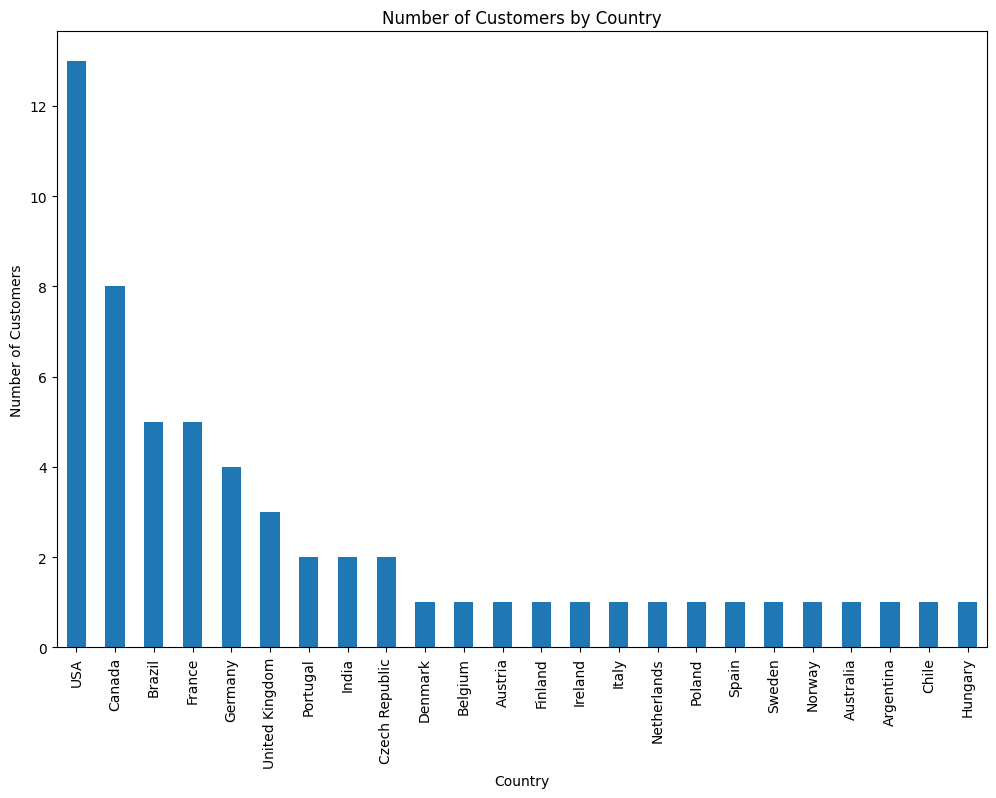

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize customers by country
plt.figure(figsize=(12, 8))
customers_by_country.plot(kind='bar')
plt.title('Number of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
# Count of customers by city
customers_by_city = customer_cleaned['city'].value_counts()
print(customers_by_city)

city
Prague                 2
Berlin                 2
Paris                  2
São Paulo              2
London                 2
Mountain View          2
São José dos Campos    1
Dublin                 1
Lisbon                 1
Porto                  1
Frankfurt              1
Lyon                   1
Bordeaux               1
Dijon                  1
Helsinki               1
Budapest               1
Amsterdam              1
Rome                   1
Winnipeg               1
Warsaw                 1
Madrid                 1
Stockholm              1
Edinburgh              1
Sidney                 1
Buenos Aires           1
Santiago               1
Delhi                  1
Yellowknife            1
Ottawa                 1
Halifax                1
Stuttgart              1
Montréal               1
Oslo                   1
Vienne                 1
Brussels               1
Copenhagen             1
Rio de Janeiro         1
Brasília               1
Edmonton               1
Vancouver           

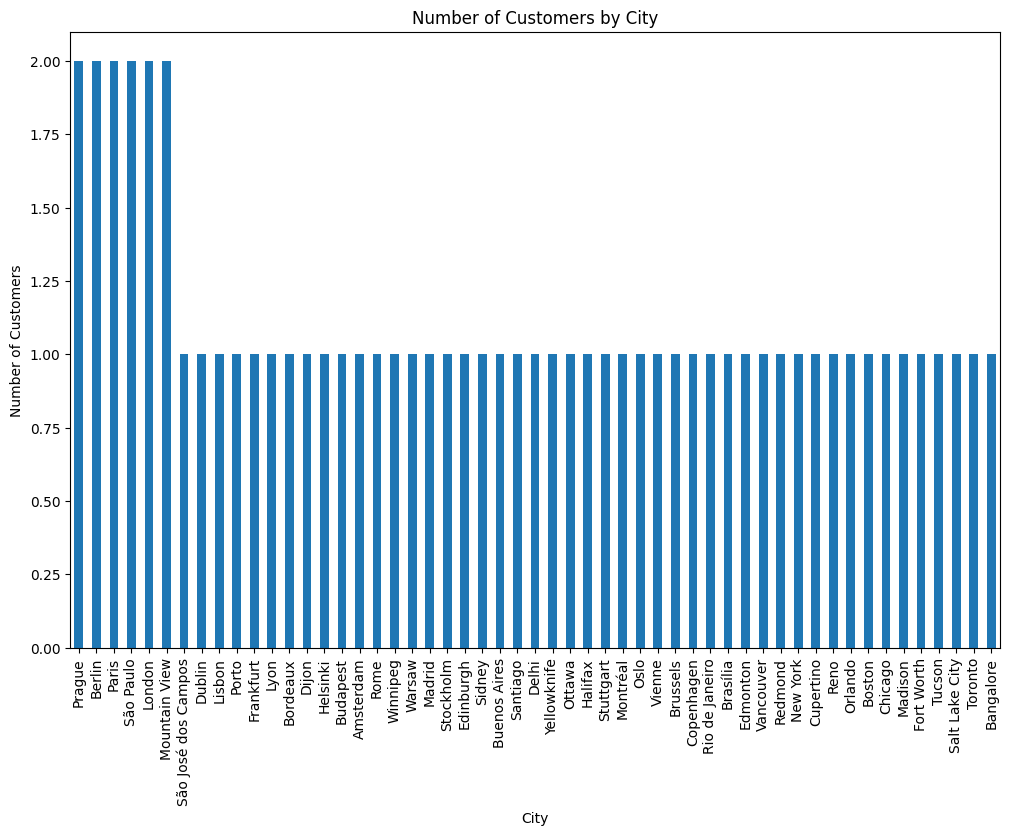

In [ ]:
# Visualization Customers by city
plt.figure(figsize=(12, 8))
customers_by_city.plot(kind='bar')
plt.title('Number of Customers by City')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.show()

### 1.Merge Data for Further Analysis
To analyze customer behavior more deeply, you might want to merge customer data with invoice data.

In [ ]:
import pandas as pd
from google.colab import files

# Upload the files
uploaded = files.upload()

# Load the invoice dataset
invoice_cleaned = pd.read_csv('invoice_cleaned.csv')
invoice_line= pd.read_csv('invoice_line.csv')

# Merge customer and invoice data
customer_invoice = pd.merge(invoice_cleaned, customer_cleaned, on='customer_id')

Saving invoice_cleaned.csv to invoice_cleaned.csv
Saving invoice_line.csv to invoice_line.csv


In [ ]:
# Merge the above result with invoice_line data
customer_invoice_line = pd.merge(customer_invoice, invoice_line, on='invoice_id')

# Display the first few rows of the merged dataset
customer_invoice_line.head()

,Unnamed: 0_x,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,...,postal_code,phone,fax,email,support_rep_id,Unnamed: 0,invoice_line_id,track_id,unit_price,quantity
0,NaN,1,2,2021-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,Unknown,Germany,70174,1.98,...,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5,NaN,1,2,0.99,1
1,NaN,1,2,2021-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,Unknown,Germany,70174,1.98,...,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5,NaN,2,4,0.99,1
2,NaN,12,2,2021-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,Unknown,Germany,70174,13.86,...,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5,NaN,60,331,0.99,1
3,NaN,12,2,2021-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,Unknown,Germany,70174,13.86,...,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5,NaN,61,340,0.99,1
4,NaN,12,2,2021-02-11 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,Unknown,Germany,70174,13.86,...,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5,NaN,62,349,0.99,1


In [ ]:
 #Total Amount Spent by Each Customer
 total_spent_by_customer = customer_invoice_line.groupby('customer_id')['total'].sum()
print(total_spent_by_customer.describe())

count     59.000000
mean     353.366441
std       37.240932
min      331.660000
25%      334.620000
50%      334.620000
75%      352.620000
max      502.620000
Name: total, dtype: float64


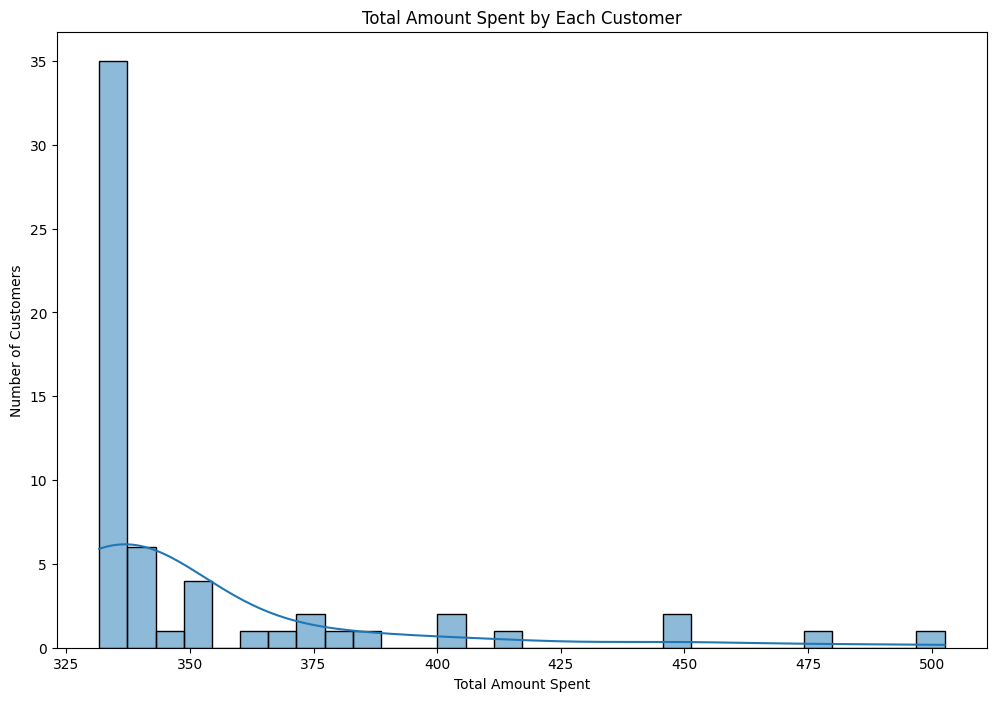

In [ ]:
# Plot the total amount spent by each customer
plt.figure(figsize=(12, 8))
sns.histplot(total_spent_by_customer, bins=30, kde=True)
plt.title('Total Amount Spent by Each Customer')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
plt.show()

The histogram and KDE plot reveal that most customers have a total spending amount of around 334. This suggests that the typical spending behavior of customers is clustered around this value. The right-skewed distribution indicates that while higher spending customers exist, they are fewer in number compared to those who spend around 325. This information can be valuable for identifying typical spending patterns and potentially targeting promotions or marketing efforts towards encouraging higher spending among the majority of customers.

In [ ]:
# Average amount spent per purchase by each customer
avg_spent_per_purchase = customer_invoice_line.groupby('customer_id')['total'].mean()
print(avg_spent_per_purchase.describe())

count    59.000000
mean      9.307335
std       0.977181
min       8.805789
25%       8.805789
50%       8.805789
75%       9.279474
max      13.226842
Name: total, dtype: float64


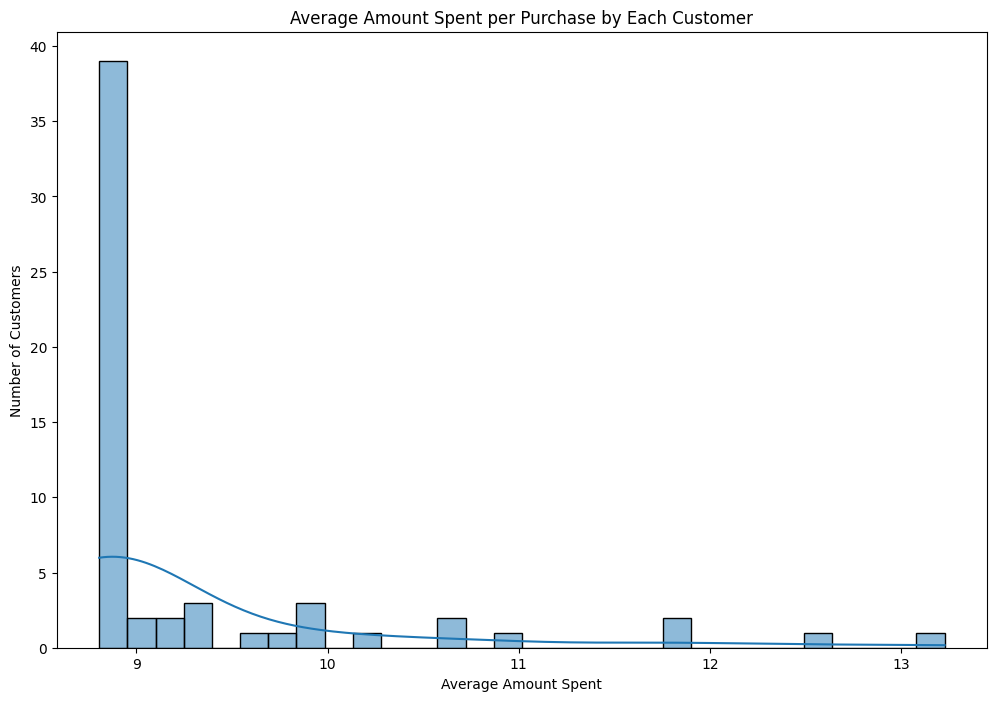

In [ ]:
# Plot the average amount spent per purchase by each customer
plt.figure(figsize=(12, 8))
sns.histplot(avg_spent_per_purchase, bins=30, kde=True)
plt.title('Average Amount Spent per Purchase by Each Customer')
plt.xlabel('Average Amount Spent')
plt.ylabel('Number of Customers')
plt.show()

The histogram and KDE plot reveal that most customers spend an average amount of around 9. This suggests that the typical spending behavior of customers is clustered around this value. The right-skewed distribution indicates that while higher spending customers exist, they are fewer in number compared to those who spend around 9. This information can be valuable for identifying typical spending patterns and potentially targeting promotions or marketing efforts towards encouraging higher spending among the majority of customers.

In [ ]:
# Total number of purchases by each customer
total_purchases_by_customer = customer_invoice_line.groupby('customer_id').size()
print(total_purchases_by_customer.describe())

count    59.000000
mean     37.966102
std       0.260378
min      36.000000
25%      38.000000
50%      38.000000
75%      38.000000
max      38.000000
dtype: float64


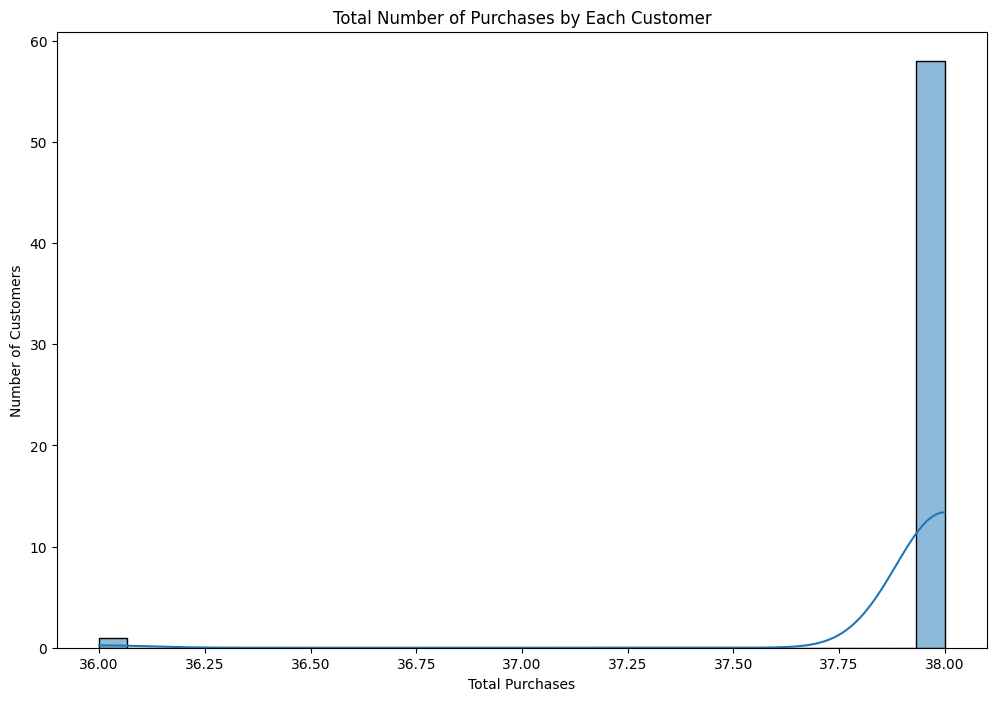

In [ ]:
# Plot the total number of purchases by each customer
plt.figure(figsize=(12, 8))
sns.histplot(total_purchases_by_customer, bins=30, kde=True)
plt.title('Total Number of Purchases by Each Customer')
plt.xlabel('Total Purchases')
plt.ylabel('Number of Customers')
plt.show()

The histogram and KDE plot reveal that the vast majority of customers have made around 38 total purchases. This could suggest a uniform purchasing behavior among the customers, or it might indicate a specific sales strategy or promotion that led to this clustering.